# MICROSOFT MOVIE ANALYSIS"
**The Author:** Sally Musanga Kabole
    

# Project Overview
##### Using exploratory data analysis to generate insights for a Microsoft's pet project.



# Business Problem
#### To explore and find actionable insights into what type of films are currently doing the best at the box office so as to help Microsoft decide which type of films to create in their new movie studio. 

In [219]:
#Importing python libraries
import pandas as pd

In [220]:
title_data =pd.read_csv('zippedData/title.basics.csv')
title_data.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [221]:
rating_data =pd.read_csv('zippedData/title.ratings.csv')
rating_data

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [222]:
gross =pd.read_csv('zippedData/bom.movie_gross.csv')
gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


# Data Understanding
##### The data contains detailed data about different movies it is evident that :
- Unit of Analysis from the sample data (a row represents a single movie)
- Unique identifier (Each movie is uniquely identified by a title)
- Features (Identify relationship between movie rating and domestic gross/ foreign gross)

In [223]:
print(gross.columns) 

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


In [224]:
#An overview of the data
print(gross.info()) 
print('\n')
print('************')
print('************')
print( gross.describe())
print('\n')
print('************')
print('************')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


************
************
       domestic_gross         year
count    3.359000e+03  3387.000000
mean     2.874585e+07  2013.958075
std      6.698250e+07     2.478141
min      1.000000e+02  2010.000000
25%      1.200000e+05  2012.000000
50%      1.400000e+06  2014.000000
75%      2.790000e+07  2016.000000
max      9.367000e+08  2018.000000


************
************


## Data Preparation

In [240]:
#Convert the data type of the foreign_gross column from object to float
gross['foreign_gross'] = gross['foreign_gross'].apply(float)
gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 174.1+ KB


In [225]:
#checking for percentage of missing values
tot_missing = gross['foreign_gross'].isna().sum()
percent_missing = (tot_missing/3387) *100
percent_missing
# We still have hope with this dataset and won't drop it since it is a critical feature in our analysis

39.85828166519043

In [226]:
#checking for missing values in year column
tot_missing_yr = gross['year'].isna().sum()

tot_missing_yr

0

In [227]:
#We Really have to drop the values to avoid extra noise
gross.dropna(inplace=True)
gross.shape

(2007, 5)

In [228]:
#checking for duplicates
gross.duplicated(subset=['title']).sum()
ids = gross["title"]
gross[ids.isin(ids[ids.duplicated()])].sort_values("title")
#Rename one entry since they seem to be fifferent movies
gross.at[317,'title']='Bluebeard_Strand'
gross.loc[317]



title             Bluebeard_Strand
studio                      Strand
domestic_gross               33500
foreign_gross                 5200
year                          2010
Name: 317, dtype: object

In [229]:
gross['year'].value_counts()

2010    308
2011    290
2012    243
2014    234
2013    200
2016    192
2015    190
2017    177
2018    173
Name: year, dtype: int64

## Data Modelling

In [230]:
x = gross['foreign_gross']
y = gross['domestic_gross']

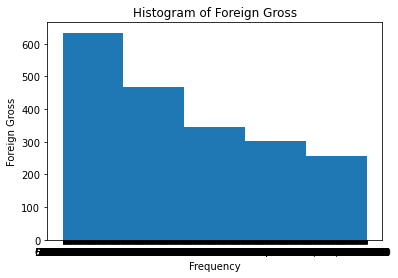

In [231]:
#import libraries
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.xlabel('Frequency')
plt.ylabel('Foreign Gross')
plt.title('Histogram of Foreign Gross')

plt.hist(x, bins=5)
plt.show() 


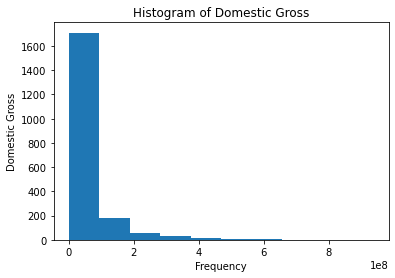

In [232]:
#import libraries
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.xlabel('Frequency')
plt.ylabel('Domestic Gross')
plt.title('Histogram of Domestic Gross')

plt.hist(y)
plt.show() 

** Both Domestic and Foreig gross seems to be normally distributed with a right skew

In [233]:
#checking for percentage of missing values in rating and title datasets
missing = rating_data['tconst'].isna().sum()
perce_missing = (tot_missing/3387) *100
perce_missing
# We still have hope with this dataset and won't drop it since it is a critical feature in our analysis

39.85828166519043

In [234]:
#checking for percentage of missing values in rating and title datasets
missing = title_data['tconst'].isna().sum()
perce_missing = (tot_missing/3387) *100
perce_missing
# We still have hope with this dataset and won't drop it since it is a critical feature in our analysis

39.85828166519043

In [241]:
#combining the rating and titles datasets
joineddf = title_data.merge(rating_data, on='tconst', how='inner')
joineddf.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517


In [242]:
#missing value check
missing = joineddf['genres'].isna().sum()
perce_missing = (missing/220000) *100
perce_missing

0.3654545454545455

In [247]:
#drop entries with null values
new_df = joineddf.dropna(subset=['genres'])
new_df['genres'].isna().sum()
new_df['genres'].value_counts()

Drama                      11612
Documentary                10313
Comedy                      5613
Horror                      2692
Comedy,Drama                2617
                           ...  
Family,War                     1
Action,Romance,Western         1
Comedy,Musical,Western         1
Crime,Documentary,Sport        1
Animation,Crime,Mystery        1
Name: genres, Length: 923, dtype: int64

In [248]:
#missing value check
miss = joineddf['averagerating'].isna().sum()
perce_miss = (miss/220000) *100
perce_miss

0.0

In [249]:
new_df.corr()

,start_year,runtime_minutes,averagerating,numvotes
start_year,1.000000,0.002718,0.041347,-0.028873
runtime_minutes,0.002718,1.000000,-0.007076,0.012428
averagerating,0.041347,-0.007076,1.000000,0.044873
numvotes,-0.028873,0.012428,0.044873,1.000000


** Very weak correlation betwen the features

In [251]:
x = new_df['averagerating']
x

0        7.0
1        7.2
2        6.9
3        6.1
4        6.5
        ... 
73850    6.2
73851    6.2
73852    8.7
73853    8.5
73855    6.5
Name: averagerating, Length: 73052, dtype: float64

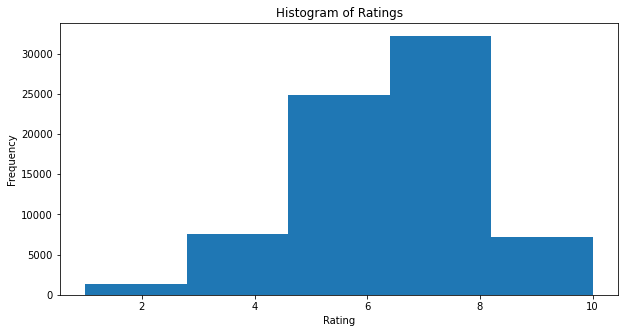

In [257]:
import matplotlib.pyplot as plt
 


fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.hist(x,
        bins = 5)
 
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Histogram of Ratings")
plt.show()

** most movies have an above average rating of between 7 and 8

In [260]:
#Rename primary_title column to title
joineddf.rename(columns = {'primary_title': 'title'}, inplace = True)
#Create a dataframe with all datasets
all_data = joineddf.merge(gross, on='title', how='inner')
all_data.head()

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000.0,2012
1,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000.0,2012
2,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000.0,2012
3,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000.0,2013
4,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000.0,2014


In [266]:
all_data.corr()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year
start_year,1.000000,0.081167,-0.017798,-0.049456,0.099050,0.117807,0.804449
runtime_minutes,0.081167,1.000000,0.246200,0.333940,0.157443,0.192140,0.066643
averagerating,-0.017798,0.246200,1.000000,0.367751,0.169863,0.150900,0.020529
numvotes,-0.049456,0.333940,0.367751,1.000000,0.625845,0.551207,-0.065840
domestic_gross,0.099050,0.157443,0.169863,0.625845,1.000000,0.788831,0.105521
foreign_gross,0.117807,0.192140,0.150900,0.551207,0.788831,1.000000,0.126306
year,0.804449,0.066643,0.020529,-0.065840,0.105521,0.126306,1.000000


** There is a strong correlation between number of votes and both domestic and foreign gross.This is furthur corroborated by the scatterplot below.

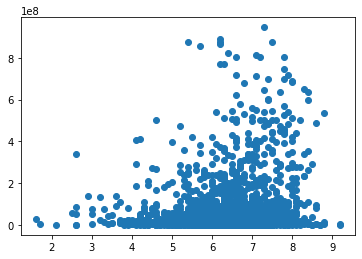

In [323]:
#Scatter plot of average rating vs foreign gross
import matplotlib.pyplot as plt


x=all_data['averagerating']
y=all_data['foreign_gross']

plt.scatter(x, y)
plt.show()

In [319]:
x=all_data['averagerating'].value_counts()
x

6.6    85
7.2    85
6.3    83
6.5    81
6.2    80
       ..
2.5     1
2.1     1
1.7     1
1.6     1
2.9     1
Name: averagerating, Length: 65, dtype: int64

In [281]:
genres = all_data['genres'].value_counts()
max_val= genres.iloc[:5]
max_col = genres.index[0]
print(max_val)


Drama                         127
Comedy,Drama                   74
Adventure,Animation,Comedy     72
Comedy,Drama,Romance           66
Drama,Romance                  62
Name: genres, dtype: int64


In [312]:
genres = all_data['genres'].value_counts()
max_val= genres.iloc[:5].index
max_col = genres.index[0]
print((max_val))

Index(['Drama', 'Comedy,Drama', 'Adventure,Animation,Comedy',
       'Comedy,Drama,Romance', 'Drama,Romance'],
      dtype='object')


## Evaluation

 - Generally movies with drama have a high rating have high returns and this is where Microsoft should focus on as a start
 - There is a need to furthur explore the different categories to identify which one have the highest returns and whether this corresponds to having a high rating
 - Furthur exploration on the relationship between other studios is also needed to determine how their production of specific genre is tied to domestic/foreign gross.

## Conclusions and Recomendations

**It is recommended for Microsoft to venture into producing Drama or Comedy type of content as this have the highes value production rate by other competitors